In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("X/X_train.parquet")
X_test = pd.read_parquet("X/X_test.parquet")
Y_train = pd.read_parquet("Y/Y_train.parquet")
Y_test = pd.read_parquet("Y/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
Complete = pd.read_parquet("dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'kernel':['linear', 'rbf'],
              'C':[0.5, 1, 5, 10, 50, 100],
              'epsilon':[0.1, 0.01, 0.001]}

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [6]:
g = GridSearch(svm.SVR(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = svm.SVR(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.026299715042114258 s, score: 0.8601250322630651
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.009791135787963867 s, score: 0.8686020501658644
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.19191789627075195 s, score: 0.8957529888584529
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.08983492851257324 s, score: 0.9740361449235317
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.27713847160339355 s, score: 0.8900759643164549
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.17535614967346191 s, score: 0.9764634139822593
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.09586596488952637 s, score: 0.8345520774113628
Probando: {'C': 1, 'eps

In [ ]:
g = GridSearch(svm.SVR(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = svm.SVR(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.1290576457977295 s, score: 0.43296091207574317
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.05638623237609863 s, score: 0.819845419701657
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.15159392356872559 s, score: 0.38870196660025014
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.1280689239501953 s, score: 0.8214976410774986
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.21256804466247559 s, score: 0.3909513462236167
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.19503569602966309 s, score: 0.8158000317205505
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.06585502624511719 s, score: 0.4031112707203144
Probando: {'C': 1, 'epsilo

In [ ]:
g = GridSearch(svm.SVR(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = svm.SVR(**g).fit(X_train, np.ravel(Y3_train))

In [ ]:
g = GridSearch(svm.SVR(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = svm.SVR(**g).fit(X_train, np.ravel(Y4_train))

In [ ]:
g = GridSearch(svm.SVR(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = svm.SVR(**g).fit(X_train, np.ravel(Y5_train))

In [6]:
g = GridSearch(svm.SVR(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = svm.SVR(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 36
Tiempo de entrenamiento: 0.06871747970581055 s, score: 0.778806234475738
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 36
Tiempo de entrenamiento: 0.024004220962524414 s, score: 0.8706147514847858
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 36
Tiempo de entrenamiento: 0.1035161018371582 s, score: 0.8092381060760655
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 36
Tiempo de entrenamiento: 0.09265327453613281 s, score: 0.9683952649134938
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 36
Tiempo de entrenamiento: 0.1785268783569336 s, score: 0.7941934132989175
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 36
Tiempo de entrenamiento: 0.22127485275268555 s, score: 0.969981562582717
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 36
Tiempo de entrenamiento: 0.06471085548400879 s, score: 0.7640800501557202
Probando: {'C': 1, 'epsilon'

## Test for each year

In [ ]:
np.abs(clf6.predict(X_test.iloc[0::4]) - np.array(Y6_test.iloc[0::4][5])).mean()

In [ ]:
np.abs(clf6.predict(X_test.iloc[1::4]) - np.array(Y6_test.iloc[1::4][5])).mean()

In [ ]:
np.abs(clf6.predict(X_test.iloc[2::4]) - np.array(Y6_test.iloc[2::4][5])).mean()

In [ ]:
np.abs(clf6.predict(X_test.iloc[3::4]) - np.array(Y6_test.iloc[3::4][5])).mean()

## One concrete example

In [ ]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

In [ ]:
scalerY.inverse_transform([Y_test.iloc[i]])

## Probamos con España

In [7]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [ ]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [ ]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [ ]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [ ]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [ ]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [9]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf6.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

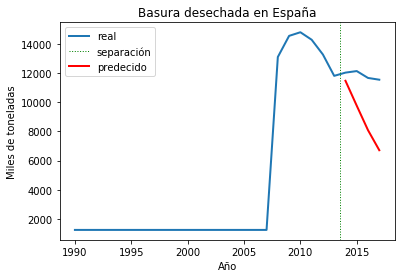

In [10]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura desechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()